In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print("Most recent date: ", recent_date)

Most recent date:  2017-08-23


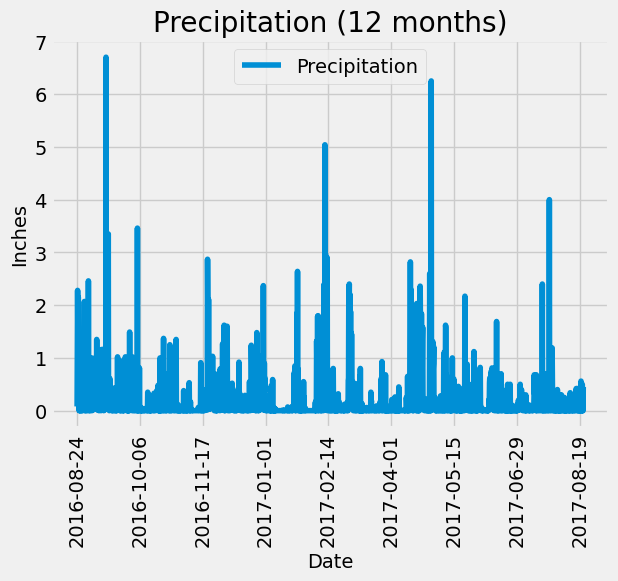

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
query_result = session.query(*sel).filter(Measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(query_result, columns=['Date', 'Precipitation'])
precipitation_df = precipitation_df.dropna(how='any')  # clean up non-value entries
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Precipitation', title="Precipitation (12 months)", rot=90)
plt.ylabel("Inches")
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
print(summary_stats)

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
print(f"Station Count: {station_count}")

Station Count: 9


In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Query to find the most active stations (i.e., what stations have the most rows)
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print each station with its corresponding row count in a list format
for station in station_activity:
    print(list(station))

['USC00519281', 2772]
['USC00519397', 2724]
['USC00513117', 2709]
['USC00519523', 2669]
['USC00516128', 2612]
['USC00514830', 2202]
['USC00511918', 1979]
['USC00517948', 1372]
['USC00518838', 511]


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find the most active station
most_active_station = station_activity[0][0]

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_observation = session.query(Measurement.tobs).\
                                filter(Measurement.station == most_active_station).\
                                filter(Measurement.date >= year_ago_date).all()

# Save the query results as a DataFrame
temp_observation_df = pd.DataFrame(temp_observation, columns=['temperature'])

# Print the results
print("The lowest temperature: ", temp_observation_df["temperature"].min())
print("The highest temperature: ", temp_observation_df["temperature"].max())
print("The average temperature: ", temp_observation_df["temperature"].mean())

The lowest temperature:  59.0
The highest temperature:  83.0
The average temperature:  73.0968660968661


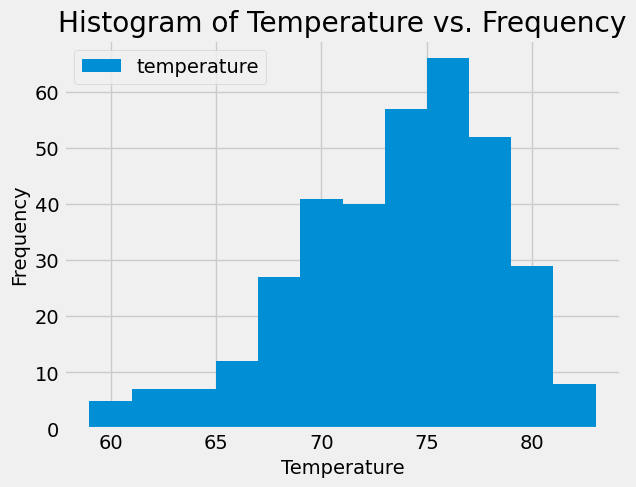

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation_df.plot.hist(bins=12, title="Histogram of Temperature vs. Frequency")
plt.xlabel('Temperature')
plt.show()

# Close Session

In [27]:
# Close Session
session.close()